In [1]:
import torch

import numpy as np

from sbi.analysis import pairplot
from sbi.inference import NPE,NLE
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)
from torch.distributions import Normal, Independent

In [2]:
num_dim = 1  # Here, num_dim = 1 because only mu is being inferred

# Define the simulator function
# torch.randn: Generates random numbers following a standard normal distribution 
# (mean = 0, standard deviation = 1).
def simulator(theta, n=1000):
    # theta[0] is μ, theta[1] is σ
    mu, sigma2 = theta[0], 1
    sigma = np.sqrt(sigma2)
    return mu + sigma * torch.randn(n)  # Generate n observations

# torch.ones(num_dim) defines the dimension of the parameters

# prior = BoxUniform(low= -2 * torch.ones(num_dim), high=2 * torch.ones(num_dim))
# Must use torch.distributions because sampling is required
prior = Normal(torch.tensor([0.0]), torch.tensor([1.0]))


In [3]:
prior, num_parameters, prior_returns_numpy = process_prior(prior)

# Check simulator, returns PyTorch simulator able to simulate batches.
simulator = process_simulator(simulator, prior, prior_returns_numpy)

# Consistency check after making ready for sbi.
check_sbi_inputs(simulator, prior)


In [4]:


inference = NLE(prior=prior)
# get test data
num_simulations = 500
theta = prior.sample((num_simulations,))
x = simulator(theta)

print("theta.shape", theta.shape)
print("x.shape", x.shape)

theta.shape torch.Size([500, 1])
x.shape torch.Size([500, 1000])


In [5]:
inference = inference.append_simulations(theta, x)
density_estimator = inference.train()

 Neural network successfully converged after 142 epochs.

In [6]:
posterior = inference.build_posterior(density_estimator)

/opt/anaconda3/envs/SBI_project/lib/python3.11/site-packages/sbi/inference/posteriors/mcmc_posterior.py:115: UserWarning: The default value for thinning in MCMC sampling has been changed from 10 to 1. This might cause the results differ from the last benchmark.
  thin = _process_thin_default(thin)


In [7]:
theta_true = torch.tensor([[0]])  # μ = 0.0
x_obs = simulator(theta_true)
samples = posterior.sample((10000,), x=x_obs)

Running vectorized MCMC with 20 chains:   0%|          | 0/15000 [00:00<?, ?it/s]

In [8]:
import numpy as np

# Prior parameters
mu_0 = 0
sigma_0_sq = 1  # Prior variance

# Data preparation
Z = x_obs.numpy()  # If PyTorch tensor, convert to NumPy array
Z_flat = Z.flatten()  # Flatten to a one-dimensional array

# Sample mean and sample size
Y_mean = np.mean(Z_flat)  # Sample mean
n = Z.size  # Sample size

# Posterior mean μ'
mu_post = (mu_0 + n * Y_mean) / (1 + n)

# Posterior variance σ_post^2
sigma_post_sq = sigma_0_sq / (1 + n)

# Output results
print("Posterior Mean (mu_post):", mu_post)
print("Posterior Variance (sigma_post_sq):", sigma_post_sq)


Posterior Mean (mu_post): 0.01146778144262411
Posterior Variance (sigma_post_sq): 0.000999000999000999


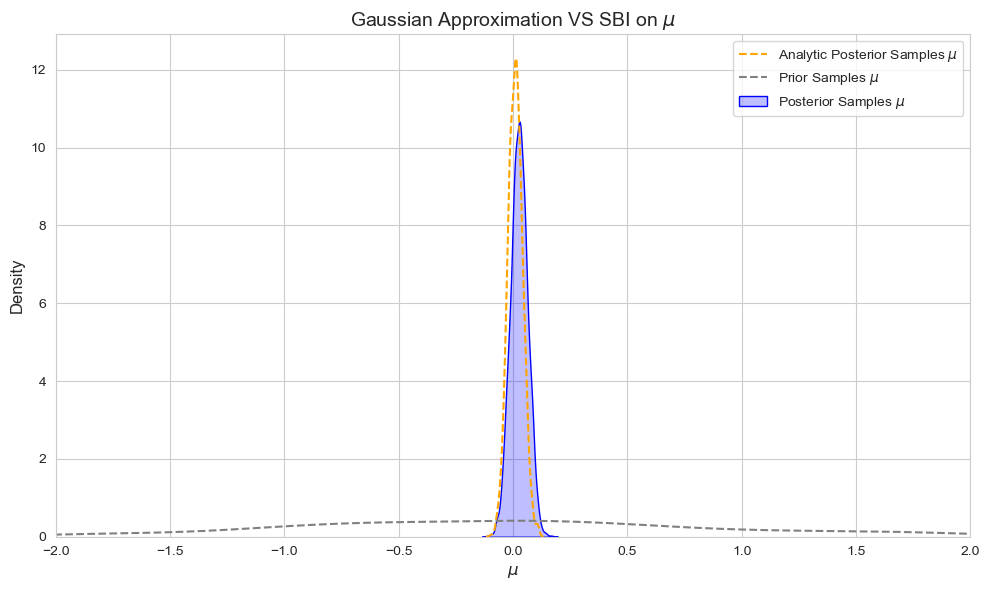

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume mu_post and sigma_post_sq are already defined
sigma_post = np.sqrt(sigma_post_sq)    # Posterior standard deviation
sigma_prior_sq = 1
mu_prior = 0
sigma_prior = np.sqrt(sigma_prior_sq)

# Generate samples from the Posterior distribution
num_samples = 1000  # Number of samples
mu_samples = np.random.normal(loc=mu_post, scale=sigma_post, size=num_samples)

# Generate samples from the Prior distribution
prior_samples = np.random.normal(loc=mu_prior, scale=sigma_prior, size=num_samples)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot KDE for the Posterior samples
sns.kdeplot(mu_samples, ax=ax, label=r"Analytic Posterior Samples $\mu$", color="orange", linestyle="--")

# Plot KDE for the Prior samples
sns.kdeplot(prior_samples, ax=ax, label=r"Prior Samples $\mu$", color="grey", linestyle="--")

# Extract the first dimension of samples (e.g., $\mu$)
mu_samples = samples[:, 0].numpy()
sns.kdeplot(mu_samples, ax=ax, fill=True, label=r"Posterior Samples $\mu$", color="blue")

# Add legend, title, and labels
ax.set_title("Gaussian Approximation VS SBI on $\mu$", fontsize=14)
ax.set_xlabel(r"$\mu$", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

# Set x-axis range
ax.set_xlim(-2, 2)

# Show the plot
plt.tight_layout()
plt.show()


In [10]:
theta_true = torch.tensor([[0.3]])  # μ = 0.3
x_obs = simulator(theta_true)
samples = posterior.sample((10000,), x=x_obs)

Running vectorized MCMC with 20 chains:   0%|          | 0/15000 [00:00<?, ?it/s]

In [11]:
import numpy as np

# Prior parameters
mu_0 = 0
sigma_0_sq = 1  # Prior variance

# Data preparation
Z = x_obs.numpy()  # If PyTorch tensor, convert to NumPy array
Z_flat = Z.flatten()  # Flatten to a one-dimensional array

# Sample mean and sample size
Y_mean = np.mean(Z_flat)  # Sample mean
n = Z.size  # Sample size

# Posterior mean μ'
mu_post = (mu_0 + n * Y_mean) / (1 + n)

# Posterior variance σ_post^2
sigma_post_sq = sigma_0_sq / (1 + n)

# Output results
print("Posterior Mean (mu_post):", mu_post)
print("Posterior Variance (sigma_post_sq):", sigma_post_sq)


Posterior Mean (mu_post): 0.3381562340152371
Posterior Variance (sigma_post_sq): 0.000999000999000999


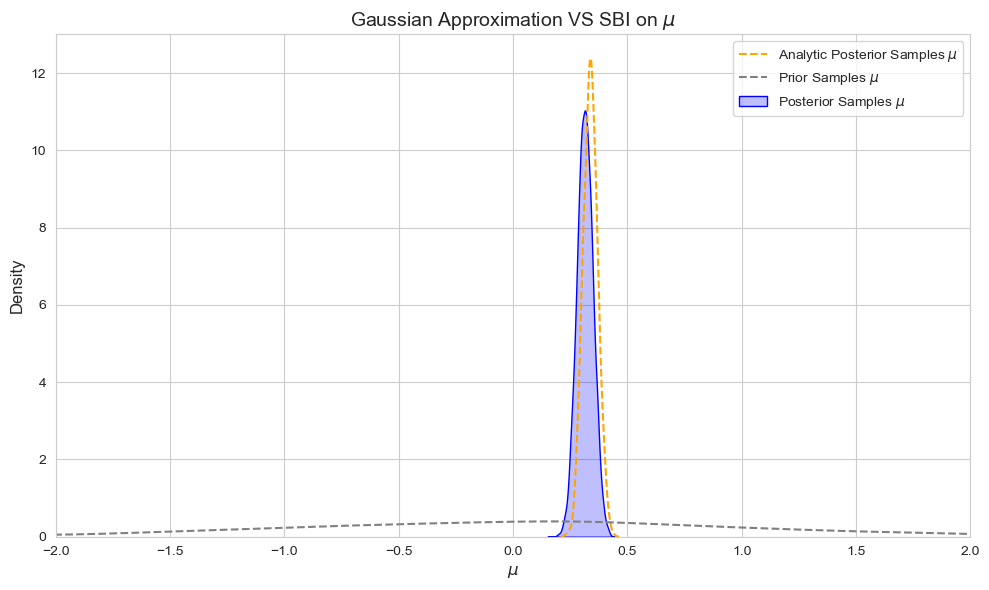

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume mu_post and sigma_post_sq are already defined
sigma_post = np.sqrt(sigma_post_sq)    # Posterior standard deviation
sigma_prior_sq = 1
mu_prior = 0
sigma_prior = np.sqrt(sigma_prior_sq)

# Generate samples from the Posterior distribution
num_samples = 1000  # Number of samples
mu_samples = np.random.normal(loc=mu_post, scale=sigma_post, size=num_samples)

# Generate samples from the Prior distribution
prior_samples = np.random.normal(loc=mu_prior, scale=sigma_prior, size=num_samples)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot KDE for the Posterior samples
sns.kdeplot(mu_samples, ax=ax, label=r"Analytic Posterior Samples $\mu$", color="orange", linestyle="--")

# Plot KDE for the Prior samples
sns.kdeplot(prior_samples, ax=ax, label=r"Prior Samples $\mu$", color="grey", linestyle="--")

# Extract the first dimension of samples (e.g., $\mu$)
mu_samples = samples[:, 0].numpy()
sns.kdeplot(mu_samples, ax=ax, fill=True, label=r"Posterior Samples $\mu$", color="blue")

# Add legend, title, and labels
ax.set_title("Gaussian Approximation VS SBI on $\mu$", fontsize=14)
ax.set_xlabel(r"$\mu$", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

# Set x-axis range
ax.set_xlim(-2, 2)

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
theta_true = torch.tensor([[-1]])  # μ = 1.0
x_obs = simulator(theta_true)
samples = posterior.sample((10000,), x=x_obs)

Running vectorized MCMC with 20 chains:   0%|          | 0/15000 [00:00<?, ?it/s]

In [14]:
import numpy as np

# Prior parameters
mu_0 = 0
sigma_0_sq = 1  # Prior variance

# Data preparation
Z = x_obs.numpy()  # If PyTorch tensor, convert to NumPy array
Z_flat = Z.flatten()  # Flatten to a one-dimensional array

# Sample mean and sample size
Y_mean = np.mean(Z_flat)  # Sample mean
n = Z.size  # Sample size

# Posterior mean μ'
mu_post = (mu_0 + n * Y_mean) / (1 + n)

# Posterior variance σ_post^2
sigma_post_sq = sigma_0_sq / (1 + n)

# Output results
print("Posterior Mean (mu_post):", mu_post)
print("Posterior Variance (sigma_post_sq):", sigma_post_sq)


Posterior Mean (mu_post): -0.9360099053168511
Posterior Variance (sigma_post_sq): 0.000999000999000999


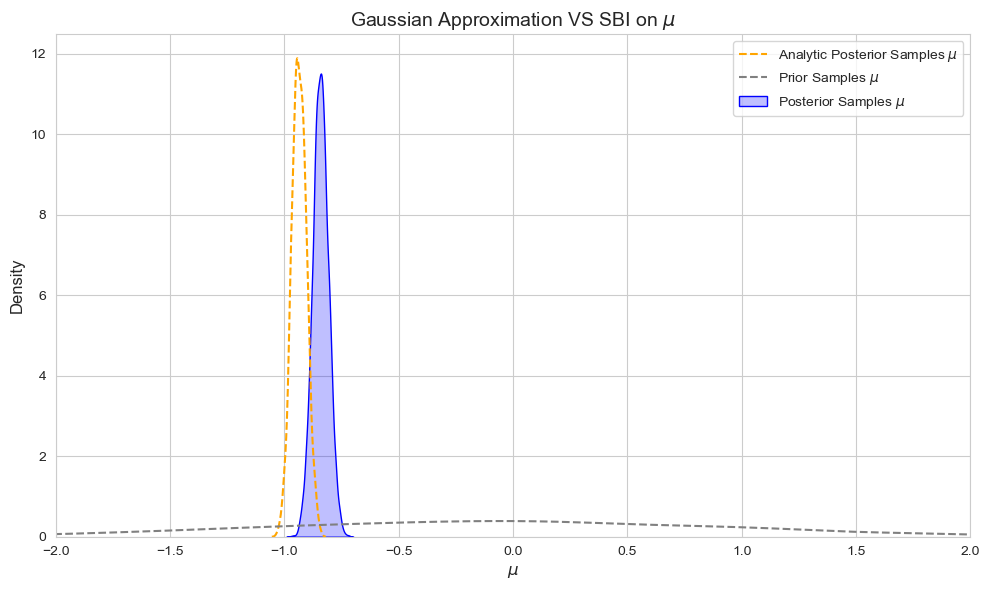

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume mu_post and sigma_post_sq are already defined
sigma_post = np.sqrt(sigma_post_sq)    # Posterior standard deviation
sigma_prior_sq = 1
mu_prior = 0
sigma_prior = np.sqrt(sigma_prior_sq)

# Generate samples from the Posterior distribution
num_samples = 1000  # Number of samples
mu_samples = np.random.normal(loc=mu_post, scale=sigma_post, size=num_samples)

# Generate samples from the Prior distribution
prior_samples = np.random.normal(loc=mu_prior, scale=sigma_prior, size=num_samples)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot KDE for the Posterior samples
sns.kdeplot(mu_samples, ax=ax, label=r"Analytic Posterior Samples $\mu$", color="orange", linestyle="--")

# Plot KDE for the Prior samples
sns.kdeplot(prior_samples, ax=ax, label=r"Prior Samples $\mu$", color="grey", linestyle="--")

# Extract the first dimension of samples (e.g., $\mu$)
mu_samples = samples[:, 0].numpy()
sns.kdeplot(mu_samples, ax=ax, fill=True, label=r"Posterior Samples $\mu$", color="blue")

# Add legend, title, and labels
ax.set_title("Gaussian Approximation VS SBI on $\mu$", fontsize=14)
ax.set_xlabel(r"$\mu$", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

# Set x-axis range
ax.set_xlim(-2, 2)

# Show the plot
plt.tight_layout()
plt.show()
